In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

In [24]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Case Count Data by County.xlsx",header=2)

In [25]:
a = df_Texas_Covid_case.set_index('County Name')

In [26]:
b = a.T.Bexar[a.columns[1:]]

In [27]:
dated_dict = {}
count = 0
for x in b:
    month_temp = int(b.index[count][-5:].split('-')[0])
    day_temp = int(b.index[count][-5:].split('-')[1])
    dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1

In [28]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Total Cases'])

In [29]:
c = dated_df.set_index('Date')

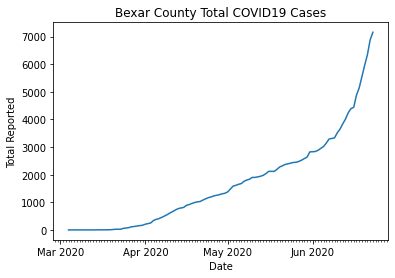

In [30]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Total Reported',color='black')
plt.plot(c)
plt.title('Bexar County Total COVID19 Cases')
plt.savefig('BexarTotal.png')

In [31]:
c_7day_moving= c.rolling(7).mean().shift()

In [32]:
c

,Total Cases
Date,
2020-03-04,0.0
2020-03-05,0.0
2020-03-06,0.0
2020-03-09,0.0
2020-03-10,0.0
...,...
2020-06-19,5550.0
2020-06-20,5962.0
2020-06-21,6344.0


In [33]:
x = c.diff(periods = 1)

In [34]:
print(x[-5:].to_markdown())

| Date                |   Total Cases |
|:--------------------|--------------:|
| 2020-06-19 00:00:00 |           408 |
| 2020-06-20 00:00:00 |           412 |
| 2020-06-21 00:00:00 |           382 |
| 2020-06-22 00:00:00 |           538 |
| 2020-06-23 00:00:00 |           274 |


In [35]:
x.rename(columns={'Total Cases':'New Cases'}, inplace=True)

In [36]:
print(x[-5:].to_markdown())

| Date                |   New Cases |
|:--------------------|------------:|
| 2020-06-19 00:00:00 |         408 |
| 2020-06-20 00:00:00 |         412 |
| 2020-06-21 00:00:00 |         382 |
| 2020-06-22 00:00:00 |         538 |
| 2020-06-23 00:00:00 |         274 |


In [37]:
x_7day_moving= x.rolling(7).mean().shift()

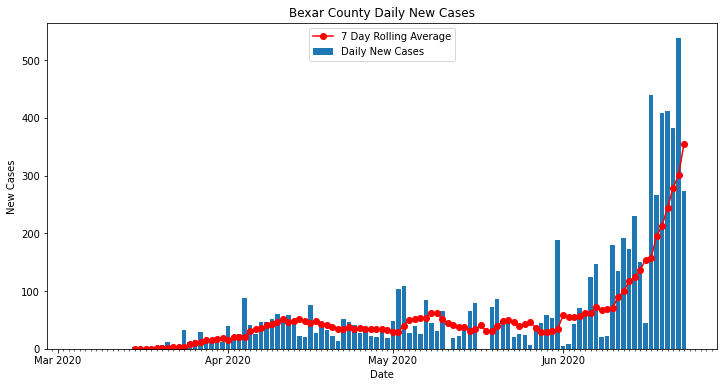

In [38]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('New Cases',color='black')
plt.title('Bexar County Daily New Cases')
plt.bar(x.index,x['New Cases'])
plt.plot(x_7day_moving,'ro-')
plt.legend(['7 Day Rolling Average','Daily New Cases'])
fig.savefig('BexarNewCasesDaily.png')